## **Steps:**



1.   MNIST Dataset
2.   DataLoader + Transformation
3.   Multilayer NN + Activation Function
4. Loss & Optimizer
5. Training Loop (Batch Training)
6. Model Evaluation
7. GPU Support





In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# CUDA Device Configuration

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters

input_size = 784 # 28 x28
hidden_size = 100
num_classes = 10

# arbitrary: subject to experimentation

num_epochs = 2
batch_size = 100
learning_rate = 0.001



In [ ]:
# MNIST

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(),download=True) # download=true, because we're retrieving the dataset here for the first time

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True) # data shuffling for enabling better training

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=False) # shuffle=false, as it doesn't matter anyway for evaluation

In [ ]:
examples = iter(train_loader)
samples, labels = next(examples) # In older torch version this would have been examples.next
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


***Explanation of above output:***

sample.shape returns --> 100x1x28x28
labels.shape returns --> 100

1. 100 is the batch size in a sample, 1 denotes number of channels {in image --> there can be red, green, blue channels --> since this MNIST dataset images are not coloured, therefore, they have only 1 channel.}

2. 28x28 is the size of image array/vector which will be filled with pixel values.





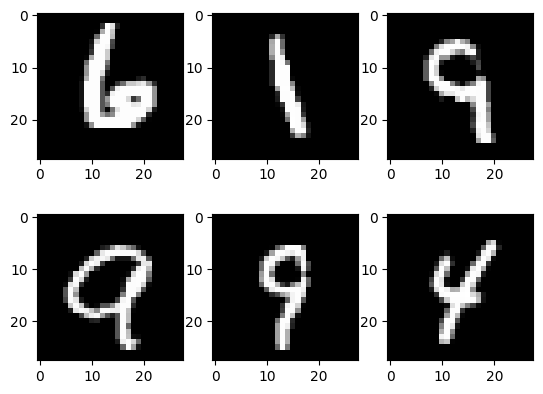

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1) # '2' == nos. of rows, '3' == nos. of columns

  plt.imshow(samples[i][0], cmap='gray') # The second index '0' denotes channel --> in this context being the first (and only channel)

plt.show()

In [ ]:
class NeuralNet(nn.Module):

  def __init__(self, input_size, hidden_size, num_classes):

    super(NeuralNet, self).__init__() # Typical constructor def

    self.l1 = nn.Linear(input_size, hidden_size) # First Linear Layer

    self.relu = nn.ReLU() # Activation function

    self.l2 = nn.Linear(hidden_size,num_classes) # Second Linear Layer

  def forward(self, x):

    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)

    return out

In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device) # to(device) will push model to GPU!

In [ ]:
# Loss & Optimizer

criterion = nn.CrossEntropyLoss() # Will automatically apply the softmax function

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
# Training Loop

n_total_steps = len(train_loader)
flatten = nn.Flatten()


for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

    # images = flatten(images)

    # Now we need to reshape our tensors


    # Originally images {or samples} array had a size: 100x1x28x28 --> 4D format
    # So we need to scale down from 4D --> 2D:

    # New size ought to be: (100x784) --> 28*28 = 784

    images = images.reshape(-1, 28*28).to(device) # --> -1 as first index means we let the tensor figure out by itself on what dimensions it can take
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)

    loss = criterion(outputs,labels) # Defining loss value parameter
    # Normally loss is computed by taking y (output) & y_pred (predicted output);

    # But here we've y_pred = output {from model(images), as expected --> to yield label of the image}
    # and y = labels; that is correct labels

    optimizer.zero_grad() # Resetting/flushing out the existing gradients

    loss.backward() # Computing fresh gradients

    optimizer.step() # Updating the weights

    if (i+1) % 100 ==0:
      print(f'Epoch {epoch+1}/{num_epochs}, Step {i+1}/{n_total_steps}, loss = {loss.item():.8f}')





Epoch 1/2, Step 100/600, loss = 0.44197944
Epoch 1/2, Step 200/600, loss = 0.17643750
Epoch 1/2, Step 300/600, loss = 0.28665215
Epoch 1/2, Step 400/600, loss = 0.33549839
Epoch 1/2, Step 500/600, loss = 0.34042799
Epoch 1/2, Step 600/600, loss = 0.26554257
Epoch 2/2, Step 100/600, loss = 0.21848439
Epoch 2/2, Step 200/600, loss = 0.17897274
Epoch 2/2, Step 300/600, loss = 0.23387478
Epoch 2/2, Step 400/600, loss = 0.15274253
Epoch 2/2, Step 500/600, loss = 0.21404940
Epoch 2/2, Step 600/600, loss = 0.07901761


In [ ]:
# Testing

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # max returns (value ,index)

        _, predicted = torch.max(outputs, 1) # Follows the logits' logic of giving max value for predicted class label {refer softmax & cross-entropy loss functioning}

        n_samples += labels.shape[0] # Returns the number of samples in current batch

        n_correct += (predicted == labels).sum().item()

    accuracy = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {accuracy} %')

Accuracy of the network on the 10000 test images: 95.44 %
